In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf
from statsmodels.stats import multitest
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'

# MOP peripheral

In [2]:
mop_periph_df = pd.read_csv('../outputs/gene_ontology/MOp_periphal_ReadZs_10X_gene_ontology.csv')
mop_periph_df['Mouse'] = 'Mouse '+mop_periph_df['sample_id'].str[1]
mop_periph_df['Slice'] = 'Slice '+mop_periph_df['sample_id'].str[3]
mop_periph_df.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Mouse,Slice
0,m1s1,Acta2,L2/3 IT,397,6.0,611.0,0.087413,26.992258,46.958252,3.938975,0.000082,0.000293,Mouse 1,Slice 1
1,m1s1,Acta2,L5 ET,51,6.0,698.0,0.032479,2.767631,6.067670,1.123562,0.261199,0.367769,Mouse 1,Slice 1
2,m1s1,Acta2,L5 IT,257,6.0,654.0,0.094270,25.067569,29.188310,4.639891,0.000003,0.000015,Mouse 1,Slice 1
3,m1s1,Acta2,L6 CT,26,5.0,304.0,0.176217,4.241585,3.271222,2.345164,0.019019,0.040833,Mouse 1,Slice 1
4,m1s1,Acta2,L6 IT,85,6.0,569.0,0.035714,2.599184,10.194193,0.814068,0.415606,0.527449,Mouse 1,Slice 1


In [17]:
mop_periph_gene_ont = mop_periph_df[
    mop_periph_df['bh_p'].le(0.05)
].groupby(['gene','ontology']).agg(
    num_samples = ('sample_id','nunique'),
    med_cells = ('num_cells','median'),
    mean_ont_score = ('med_score','mean'),
    std_ont_score = ('med_score','std'),
)

mop_periph_hits = mop_periph_gene_ont[
    mop_periph_gene_ont['num_samples'].ge(6) &
    mop_periph_gene_ont['med_cells'].ge(20)
].groupby('gene').filter(
    lambda g: g['mean_ont_score'].max()*g['mean_ont_score'].min() < 0
)

mop_periph_hits

num_samples  med_cells  mean_ont_score  std_ont_score
gene    ontology                                                         
Calb2   L2/3 IT               9      244.0       -0.324164       0.066223
        Vip                   7       43.0        0.123023       0.016404
Cldn5   Endo                 10      310.5       -0.066044       0.030190
        Oligo                 6       27.0        0.296839       0.119912
Cux2    Astro                 6       38.0        0.311305       0.080442
        L2/3 IT              12     2856.5       -0.018272       0.009830
        L6 IT Car3            7       86.0       -0.060740       0.027295
        OPC                   7       25.0        0.242259       0.067131
Dscaml1 L2/3 IT               7     1974.0        0.024837       0.007027
        L5 ET                12      453.0       -0.062100       0.014223
        L6 CT                12     1135.5       -0.051614       0.014360
        L6b                   7      102.0       -0.116809       0.041812
        Lamp5                 8      158.5       -0.095299       0.023705
        OPC                  12      165.5       -0.223800       0.031334
        Oligo                12      416.5       -0.225870       0.026952
        Sst                   8      198.5       -0.081581       0.029730
Flt1    Astro                 8       41.0        0.173386       0.067190
        Endo                 10      337.5       -0.048620       0.023007
        Oligo                12       40.5        0.335838       0.094087
Gfap    Astro                 9      258.0       -0.115589       0.038834
        Endo                  6       31.5        0.216956       0.047791
        Oligo                11      408.0        0.421571       0.071084
        SMC                  12       55.5        0.258659       0.061699
        VLMC                 12      329.5        0.071875       0.032040
Pou3f3  Endo                  6       32.5        0.207623       0.070088
        L2/3 IT              10     2283.5       -0.032198       0.006019
        Oligo                12      728.0        0.103991       0.020891
        Sst                   6      198.5        0.067695       0.017068
Ptprt   Astro                10      177.0       -0.222038       0.067235
        L2/3 IT              12     2436.0        0.052400       0.009604
        L5 ET                 9      303.0        0.070510       0.028575
        L6 CT                10      393.0        0.094523       0.059682
        L6 IT                 8     1053.0        0.022806       0.004934
        Pvalb                11      198.0        0.060663       0.013867
Rnf152  L6 CT                11     1348.0        0.045191       0.008760
        SMC                   9       39.0       -0.307751       0.077693
Sox10   OPC                  12      327.5       -0.062535       0.022384
        Oligo                 9     1404.0        0.033689       0.009734
Sulf2   L2/3 IT               6      602.5        0.044491       0.016975
        L5 ET                 6      687.5       -0.020836       0.004515
        L5 IT                 7     1230.0        0.021169       0.005447
        L6 IT                11      437.0        0.063479       0.016207
        L6 IT Car3            6       37.5        0.163177       0.053125
        OPC                   9      344.0        0.049640       0.015480
Syt6    L6 CT                12     1856.0       -0.067306       0.006997
        L6 IT                 6       32.5        0.333718       0.119312
Tshz2   Endo                  9       69.0       -0.226133       0.080454
        L5 ET                 6      119.5        0.089814       0.031672
        L5 IT                 8       39.5        0.280614       0.075813
        L5/6 NP              11      294.0        0.054943       0.008845
Ubash3b Oligo                 8       83.0       -0.235512       0.084053
        Pvalb                11      447.0        0.064022       0.020762
Unc5b   Endo            

In [28]:
# simplified diagram for a single gene
genes = mop_periph_hits.reset_index()['gene'].unique()

pdf = matplotlib.backends.backend_pdf.PdfPages('SRRS_MOp_peripheral_differential_genes.pdf')

for gene in genes:

    plot_df = mop_periph_df[mop_periph_df['gene'].eq(gene)].copy()
    plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
    plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    ax = sns.stripplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        hue = 'sample',
        hue_order = sorted(plot_df['sample'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
pdf.close()

In [30]:
genes = ['Dscaml1', 'Flt1', 'Tshz2']

for gene in genes:
    plot_df = mop_periph_df[mop_periph_df['gene'].eq(gene)].copy()
    plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
    plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    ax = sns.stripplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        hue = 'sample',
        hue_order = sorted(plot_df['sample'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    plt.savefig('{}_MOp_periph_boxplot.svg'.format(gene))
    plt.close()
    

# MOP Radial

In [32]:
mop_radial_df = pd.read_csv('../outputs/gene_ontology/MOp_radial_ReadZs_gene_ontology.csv')
mop_radial_df['Mouse'] = 'Mouse '+mop_radial_df['sample_id'].str[1]
mop_radial_df['Slice'] = 'Slice '+mop_radial_df['sample_id'].str[3]
mop_radial_df.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Mouse,Slice
0,m1s1,Acta2,L2/3 IT,397,6.0,611.0,0.069892,26.390894,46.958252,3.851218,0.000118,0.000387,Mouse 1,Slice 1
1,m1s1,Acta2,L5 ET,51,6.0,698.0,0.051064,4.249919,6.067670,1.725320,0.084470,0.146937,Mouse 1,Slice 1
2,m1s1,Acta2,L5 IT,257,6.0,654.0,0.055679,12.965918,29.188310,2.399931,0.016398,0.035691,Mouse 1,Slice 1
3,m1s1,Acta2,L6 CT,26,5.0,304.0,-0.197255,-4.178031,3.271222,-2.310025,0.020887,0.044275,Mouse 1,Slice 1
4,m1s1,Acta2,L6 IT,85,6.0,569.0,0.091278,4.741353,10.194193,1.484998,0.137544,0.220147,Mouse 1,Slice 1


In [33]:
mop_radial_gene_ont = mop_radial_df[
    mop_radial_df['bh_p'].le(0.05)
].groupby(['gene','ontology']).agg(
    num_samples = ('sample_id','nunique'),
    med_cells = ('num_cells','median'),
    mean_ont_score = ('med_score','mean'),
    std_ont_score = ('med_score','std'),
)

mop_radial_hits = mop_radial_gene_ont[
    mop_radial_gene_ont['num_samples'].ge(6) &
    mop_radial_gene_ont['med_cells'].ge(20)
].groupby('gene').filter(
    lambda g: g['mean_ont_score'].max()*g['mean_ont_score'].min() < 0
)

mop_radial_hits

num_samples  med_cells  mean_ont_score  std_ont_score
gene    ontology                                                       
Ano4    L5 IT               8      178.0        0.086484       0.026575
        L6 CT               6     1197.0       -0.052429       0.011424
        L6 IT               8      171.5        0.076308       0.030199
        Oligo              12      838.0       -0.118764       0.025314
Aqp4    Astro              12      721.0       -0.284972       0.019689
...                       ...        ...             ...            ...
Ubash3b Pvalb              12      433.5       -0.126541       0.017686
        Sst                 8      182.0       -0.087128       0.022763
Vtn     Endo                7       24.0        0.233354       0.058442
        SMC                12      169.5       -0.129088       0.022279
        VLMC               12      279.0       -0.137769       0.027737

[91 rows x 4 columns]

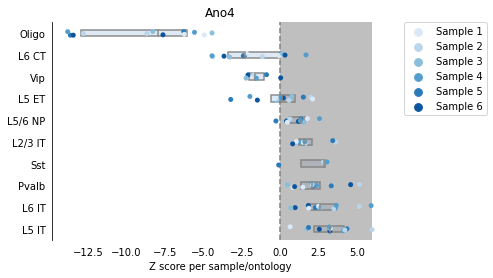

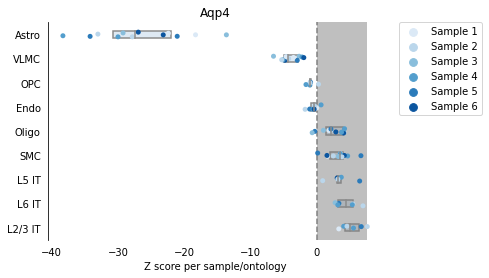

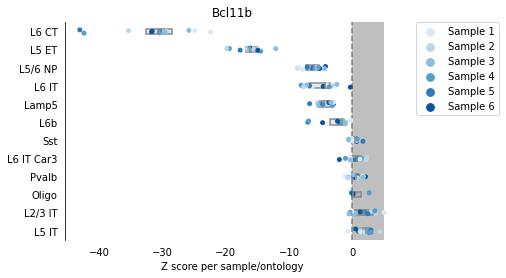

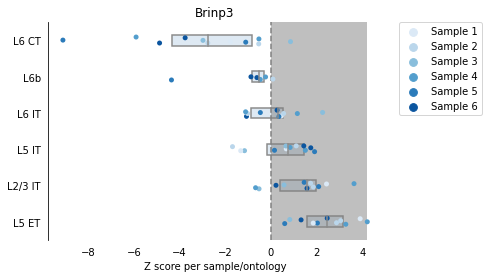

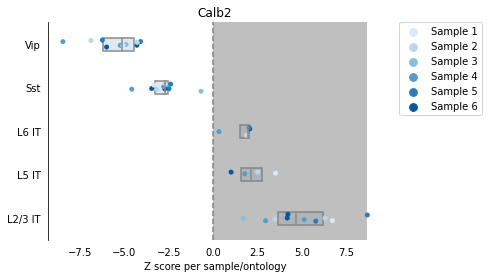

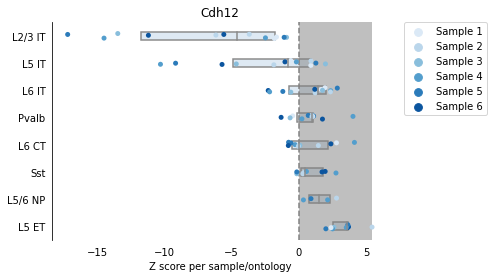

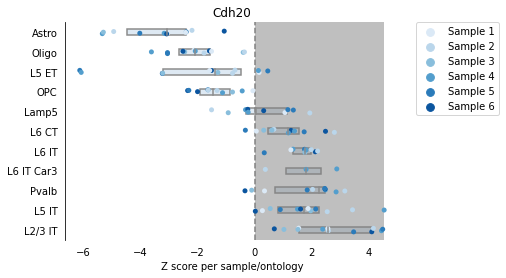

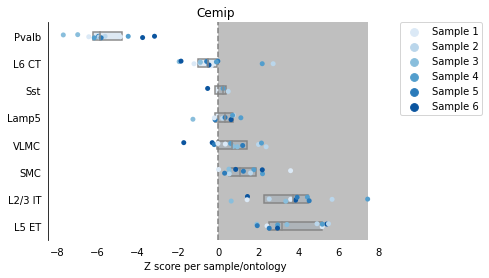

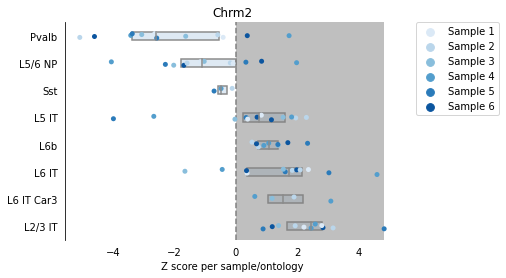

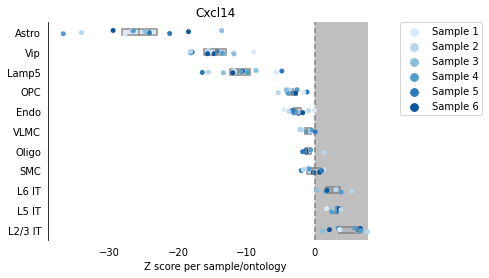

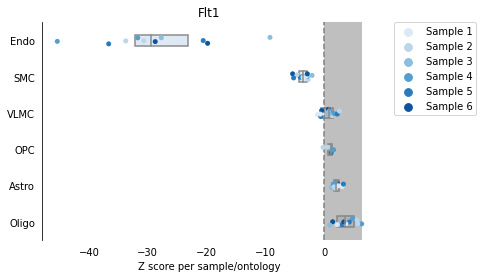

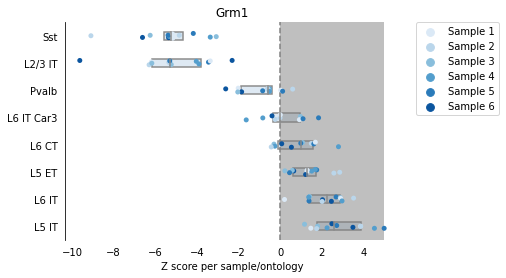

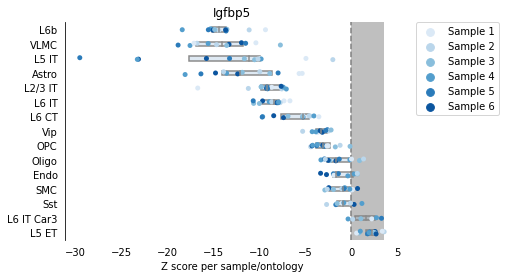

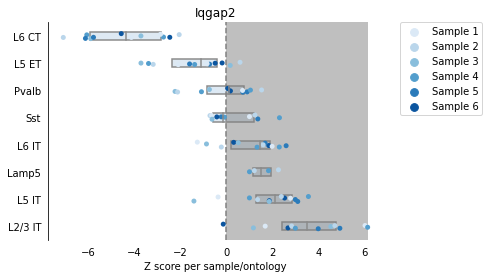

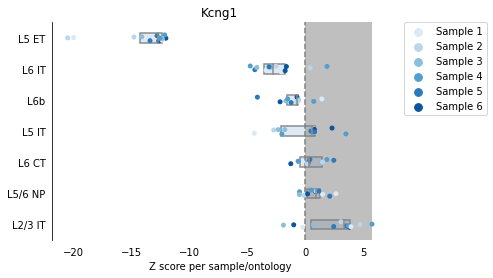

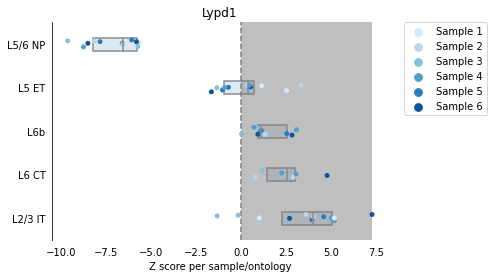

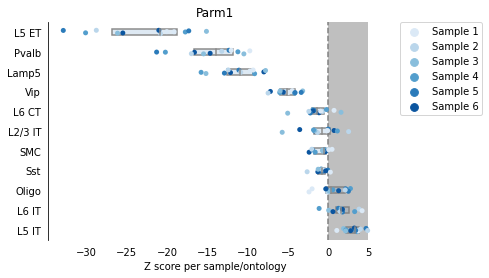

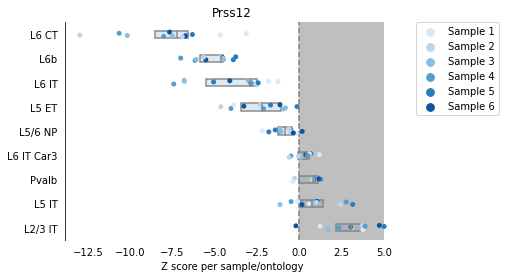

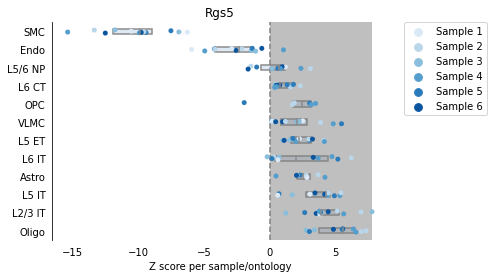

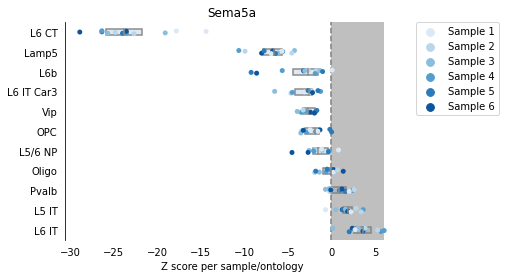

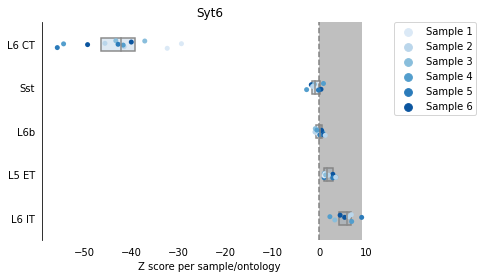

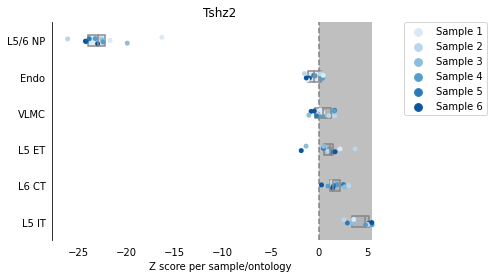

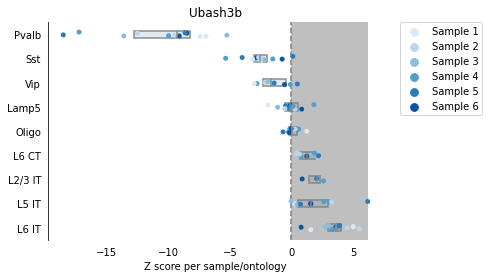

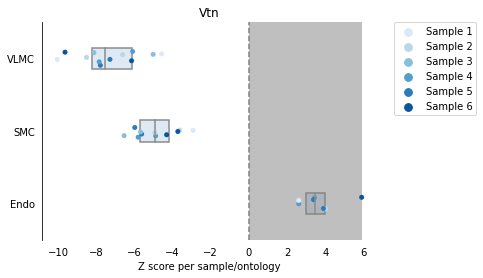

In [34]:
# simplified diagram for a single gene
genes = mop_radial_hits.reset_index()['gene'].unique()

pdf = matplotlib.backends.backend_pdf.PdfPages('SRRS_MOp_radial_differential_genes.pdf')

for gene in genes:

    plot_df = mop_radial_df[mop_radial_df['gene'].eq(gene)].copy()
    plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
    plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    ax = sns.stripplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        hue = 'sample',
        hue_order = sorted(plot_df['sample'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    plt.tight_layout()
    #pdf.savefig()
    plt.close()
    
pdf.close()

In [40]:
genes = ['Vtn', 'Calb2', 'Cemip']

for gene in genes:
    plot_df = mop_radial_df[mop_radial_df['gene'].eq(gene)].copy()
    plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
    plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    ax = sns.stripplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        hue = 'sample',
        hue_order = sorted(plot_df['sample'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'ontology',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    plt.savefig('{}_MOp_radial_boxplot.svg'.format(gene))
    plt.close()
    

# Brainmap Peripheral

In [3]:
viz_periph_df = pd.read_csv('../outputs/gene_ontology/Vizgen_Brainmap_peripheral.csv')
viz_periph_df['Slice'] = 'Slice '+viz_periph_df['sample_id'].str[1]
viz_periph_df['Replicate'] = 'Replicate '+viz_periph_df['sample_id'].str[3]
viz_periph_df.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Slice,Replicate
0,s1r1,Abcc9,14,20,10.0,880.0,-0.056263,-0.984834,1.544349,-0.792483,0.428079,0.504933,Slice 1,Replicate 1
1,s1r1,Ackr1,0,430,10.5,993.5,0.009465,0.330981,33.477725,0.057204,0.954383,0.965548,Slice 1,Replicate 1
2,s1r1,Ackr1,1,443,13.0,948.0,-0.019802,-9.590985,30.814218,-1.727777,0.084028,0.122993,Slice 1,Replicate 1
3,s1r1,Ackr1,2,321,10.0,959.0,-0.034091,-8.687521,25.477803,-1.721135,0.085226,0.124497,Slice 1,Replicate 1
4,s1r1,Ackr1,3,273,8.0,1092.0,-0.023364,-5.742935,24.924740,-1.150320,0.250012,0.320098,Slice 1,Replicate 1


In [6]:
viz_periph_gene_ont = viz_periph_df[
    viz_periph_df['bh_p'].le(0.05)
].groupby(['gene','annotation']).agg(
    num_samples = ('sample_id','nunique'),
    med_cells = ('num_cells','median'),
    mean_ont_score = ('med_score','mean'),
    std_ont_score = ('med_score','std'),
)

viz_periph_hits = viz_periph_gene_ont[
    viz_periph_gene_ont['num_samples'].ge(4) &
    viz_periph_gene_ont['med_cells'].ge(20)
].groupby('gene').filter(
    lambda g: g['mean_ont_score'].max()*g['mean_ont_score'].min() < 0
)

viz_periph_hits

num_samples  med_cells  mean_ont_score  std_ont_score
gene  annotation                                                       
Chrm3 1                     6      272.5       -0.046464       0.026342
      2                     4      201.0       -0.051202       0.019799
      3                     4      221.0       -0.061563       0.043824
      4                     4      216.5       -0.051958       0.018150
      5                     4      212.5        0.009336       0.052198
      6                     5      167.0       -0.045032       0.020649
      7                     4      253.0       -0.060027       0.020792
      13                    4      149.0       -0.066795       0.095058
      20                    4       45.5       -0.107233       0.047779
Drd1  0                     4      265.0        0.045735       0.076298
      2                     5      131.0       -0.054752       0.009475
      5                     6      100.5        0.003581       0.112258
      13                    6       74.0        0.084267       0.013450
      22                    5      122.0        0.124517       0.025694
Epha4 0                     7      405.0       -0.023352       0.044361
      1                     4      323.5       -0.047765       0.008483
      5                     4      280.5       -0.025608       0.040224
      13                    6      218.0       -0.033904       0.049981
      15                    4      149.0       -0.172731       0.077776
      19                    4      179.0       -0.039045       0.069347
      23                    4      160.0        0.000851       0.048849
Gjc3  3                     5       55.0        0.141600       0.219191
      6                     6      241.0       -0.146587       0.050872
Ntsr2 1                     5       46.0        0.186738       0.224022
      3                     5       28.0        0.317230       0.072960
      5                     5      100.0       -0.078993       0.395508
      6                     6       46.0        0.244538       0.168892
      7                     5       43.0        0.227874       0.052857
      11                    4       26.5        0.292118       0.116004

In [16]:
# simplified diagram for a single gene
genes = viz_periph_hits.reset_index()['gene'].unique()

pdf = matplotlib.backends.backend_pdf.PdfPages('SRRS_viz_peripheral_differential_genes.pdf')

for gene in genes:

    plot_df = viz_periph_df[viz_periph_df['gene'].eq(gene)].copy()
    plot_df['annotation'] = 'Cluster '+plot_df['annotation'].astype(str)
    plot_df = plot_df.groupby('annotation').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['slice'] = 'Slice '+plot_df['sample_id'].str[1]
    plot_df['replicate'] = 'Replicate '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('annotation')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    fig = plt.figure(figsize=(5,8))
    
    ax = sns.stripplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        hue = 'slice',
        hue_order = sorted(plot_df['slice'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
pdf.close()

In [22]:
viz_periph_hits.reset_index()['gene'].unique()

array(['Chrm3', 'Drd1', 'Epha4', 'Gjc3', 'Ntsr2'], dtype=object)

In [26]:
viz_radial_hits.reset_index()['gene'].unique()

array(['Ackr1', 'Adgrl3', 'Adora1', 'Drd1', 'Epha6', 'Epha7', 'Ephb1',
       'Erbb4', 'Fzd3', 'Gad1', 'Gpr22', 'Gprc5b', 'Grm1', 'Grm3',
       'Igf1r', 'Insr', 'Ryk', 'Slc17a6', 'Slc32a1'], dtype=object)

In [30]:
genes = ['Chrm3','Epha4']

for gene in genes:
    plot_df = viz_periph_df[viz_periph_df['gene'].eq(gene)].copy()
    plot_df['annotation'] = 'Cluster '+plot_df['annotation'].astype(str)
    plot_df = plot_df.groupby('annotation').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['slice'] = 'Slice '+plot_df['sample_id'].str[1]
    plot_df['replicate'] = 'Replicate '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('annotation')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    ax = sns.stripplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        hue = 'slice',
        hue_order = sorted(plot_df['slice'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    plt.savefig('{}_Viz_periph_boxplot.svg'.format(gene))
    plt.close()
    

# Brainmap radial

In [23]:
viz_radial_df = pd.read_csv('../outputs/gene_ontology/Vizgen_Brainmap_radial.csv')
viz_radial_df['Slice'] = 'Slice '+viz_radial_df['sample_id'].str[1]
viz_radial_df['Replicate'] = 'Replicate '+viz_radial_df['sample_id'].str[3]
viz_radial_df.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Slice,Replicate
0,s1r1,Abcc9,14,20,10.0,880.0,0.244697,3.335148,1.544349,2.683752,7.280105e-03,2.278986e-02,Slice 1,Replicate 1
1,s1r1,Ackr1,0,430,10.5,993.5,0.000952,0.410696,33.477725,0.070981,9.434128e-01,9.623304e-01,Slice 1,Replicate 1
2,s1r1,Ackr1,1,443,13.0,948.0,-0.101079,-30.136191,30.814218,-5.428912,5.669869e-08,4.640707e-07,Slice 1,Replicate 1
3,s1r1,Ackr1,2,321,10.0,959.0,-0.049596,-8.577276,25.477803,-1.699293,8.926391e-02,1.709836e-01,Slice 1,Replicate 1
4,s1r1,Ackr1,3,273,8.0,1092.0,-0.003559,7.953157,24.924740,1.593031,1.111532e-01,2.018097e-01,Slice 1,Replicate 1


In [24]:
viz_radial_gene_ont = viz_radial_df[
    viz_radial_df['bh_p'].le(0.05)
].groupby(['gene','annotation']).agg(
    num_samples = ('sample_id','nunique'),
    med_cells = ('num_cells','median'),
    mean_ont_score = ('med_score','mean'),
    std_ont_score = ('med_score','std'),
)

viz_radial_hits = viz_radial_gene_ont[
    viz_radial_gene_ont['num_samples'].ge(4) &
    viz_radial_gene_ont['med_cells'].ge(20)
].groupby('gene').filter(
    lambda g: g['mean_ont_score'].max()*g['mean_ont_score'].min() < 0
)

viz_radial_hits

num_samples  med_cells  mean_ont_score  std_ont_score
gene    annotation                                                       
Ackr1   0                     4      388.5       -0.018514       0.062784
        7                     5      256.0       -0.043114       0.093065
        20                    4      127.0        0.082769       0.036209
        23                    4      127.5        0.070630       0.064577
Adgrl3  0                     6      326.0        0.018016       0.056959
...                         ...        ...             ...            ...
Slc32a1 5                     5      172.0       -0.077493       0.076012
        6                     5      303.0       -0.111647       0.019344
        7                     6      152.0       -0.118418       0.023023
        9                     5       56.0        0.010198       0.131962
        14                    4       56.0       -0.112248       0.019253

[160 rows x 4 columns]

In [25]:
# simplified diagram for a single gene
genes = viz_radial_hits.reset_index()['gene'].unique()

pdf = matplotlib.backends.backend_pdf.PdfPages('SRRS_viz_radial_differential_genes.pdf')

for gene in genes:

    plot_df = viz_radial_df[viz_radial_df['gene'].eq(gene)].copy()
    plot_df['annotation'] = 'Cluster '+plot_df['annotation'].astype(str)
    plot_df = plot_df.groupby('annotation').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['slice'] = 'Slice '+plot_df['sample_id'].str[1]
    plot_df['replicate'] = 'Replicate '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('annotation')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    fig = plt.figure(figsize=(5,8))
    
    ax = sns.stripplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        hue = 'slice',
        hue_order = sorted(plot_df['slice'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
pdf.close()

In [31]:
genes = ['Ackr1','Slc32a1']

for gene in genes:
    plot_df = viz_radial_df[viz_radial_df['gene'].eq(gene)].copy()
    plot_df['annotation'] = 'Cluster '+plot_df['annotation'].astype(str)
    plot_df = plot_df.groupby('annotation').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['slice'] = 'Slice '+plot_df['sample_id'].str[1]
    plot_df['replicate'] = 'Replicate '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('annotation')['z'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_z')

    ax = sns.stripplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        hue = 'slice',
        hue_order = sorted(plot_df['slice'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'z',
        y = 'annotation',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,plot_df['z'].max(),facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Z score per sample/ontology')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    plt.tight_layout()
    plt.savefig('{}_Viz_radial_boxplot.svg'.format(gene))
    plt.close()
    

# SeqFISH+ peripheral

In [21]:
#Getting gene/cell counts before SRRS filters are applied
import h5py
f = h5py.File('../inputs/seqfish_plus.hdf5')
print('Num SeqFISH+ genes',f['genes'])
print('Num SeqFISH+ cells',f['cell_ids'])

anns = set()

for cell_id in f['cells']:
    cell = f['cells'][cell_id]
    anns.add(cell.attrs['annotation'])

print(anns)
f.close()

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


Num SeqFISH+ genes <HDF5 dataset "genes": shape (10000,), type "|S13">
Num SeqFISH+ cells <HDF5 dataset "cell_ids": shape (913,), type "|S8">
{'NSC', 'Excitatory layer II', 'Neuroblast', 'Microglia', 'Interneurons deep', 'unannotated', 'choroid plexus', 'OPC', 'Oligodendrocytes', 'Neural progenitors', 'Astrocytes deep', 'Interneuron', 'Endothelial', 'Neuroblasts', 'Excitatory layer 5/6', 'Astrocytes superficial', 'Excitatory layer 3', 'Ependymal', 'Excitatory layer 4', 'Excitatory 5/6'}


In [2]:
seq_periph_gene_cell = pd.read_csv('../outputs/gene_cell/SeqFish_peripheral.csv')
seq_periph_gene_cell = seq_periph_gene_cell[seq_periph_gene_cell['annotation'].ne('unannotated')]

#filter SRRS results to
#1. Drop gene/cells which have fewer than 5 gene spots of interest
#2. Drop gene/cell-type/samples with fewer than 20 cells
seq_periph_gene_cell = seq_periph_gene_cell[seq_periph_gene_cell['num_gene_spots'].ge(5)]
seq_periph_gene_cell = seq_periph_gene_cell.groupby(['gene','annotation']).filter(lambda g: len(g) >= 10)

#Calculate z from Lyapunov CLT for each gene in each sample
gb_cols = ['gene','annotation']

seq_agg_df = seq_periph_gene_cell.groupby(gb_cols).agg(
    num_cells = ('cell_id','nunique'),
    med_gene_spots = ('num_gene_spots','median'),
    med_spots = ('num_spots','median'),
    med_score = ('score','median'),
    score_sum = ('score','sum'),
    var_sum = ('variance','sum'),
).reset_index()

seq_agg_df['z'] = seq_agg_df['score_sum']/np.sqrt(seq_agg_df['var_sum'])

#Calculate two-sided p and BH correct ps
p_onesided = stats.norm.cdf(seq_agg_df['z'])
seq_agg_df['p'] = 2*np.minimum(p_onesided, 1-p_onesided)

alpha = 0.05

_,adj_p,_,_ = multitest.multipletests(
    seq_agg_df['p'],
    alpha = alpha,
    method = 'fdr_bh',
)
seq_agg_df['bh_p'] = adj_p

seq_agg_df.head()

,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,Aamp,Excitatory layer 5/6,20,5.5,12498.0,0.094839,2.226461,2.419260,1.431442,0.152304,0.401552
1,Abca2,Excitatory layer 5/6,12,5.5,12103.0,-0.008420,-0.725069,1.480116,-0.595980,0.551189,0.778389
2,Abca2,Oligodendrocytes,15,13.0,3818.0,-0.193518,-2.854666,1.020810,-2.825418,0.004722,0.041245
3,Abca3,Excitatory layer 5/6,19,7.0,10596.0,-0.149283,-2.189660,2.108726,-1.507879,0.131585,0.373690
4,Abcf2,Excitatory layer 5/6,10,6.0,12465.5,-0.117780,-0.523703,1.115562,-0.495836,0.620010,0.814105


In [26]:
print('SeqFISH+ post-SRRS num cells',seq_periph_gene_cell['cell_id'].nunique())
print('SeqFISH+ post-SRRS num genes',seq_periph_gene_cell['gene'].nunique())
print('SeqFISH+ post-SRRS num onts',seq_periph_gene_cell['annotation'].nunique())

SeqFISH+ post-SRRS num cells 654
SeqFISH+ post-SRRS num genes 527
SeqFISH+ post-SRRS num onts 15


In [31]:
seq_periph_gene_cell['num_gene_spots'].min()

5

In [34]:
seq_periph_gene_ont = seq_agg_df[
    seq_agg_df['bh_p'].le(0.05) &
    seq_agg_df['num_cells'].ge(10)
].groupby('gene').filter(
    lambda g: g['med_score'].max()*g['med_score'].min() < 0
)

seq_periph_gene_ont

,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
925,Slc17a7,Excitatory 5/6,27,35.0,8076.0,-0.122964,-3.134901,0.707259,-3.727644,0.000193,0.003377
926,Slc17a7,Excitatory layer 3,60,20.5,5830.0,-0.098681,-5.329983,3.082064,-3.036023,0.002397,0.026655
929,Slc17a7,Excitatory layer II,52,11.0,4389.0,-0.128740,-6.745676,3.922363,-3.406054,0.000659,0.009619
930,Slc17a7,Interneurons deep,10,8.0,7221.5,0.426876,3.994055,0.991095,4.011960,0.000060,0.001509


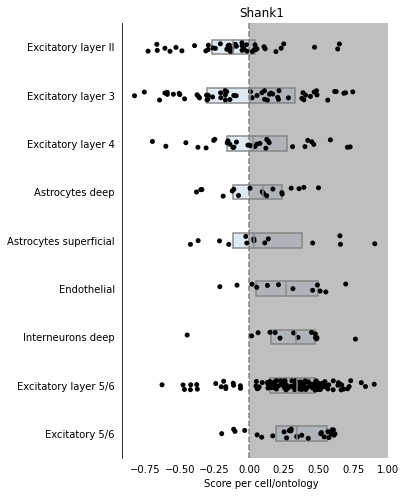

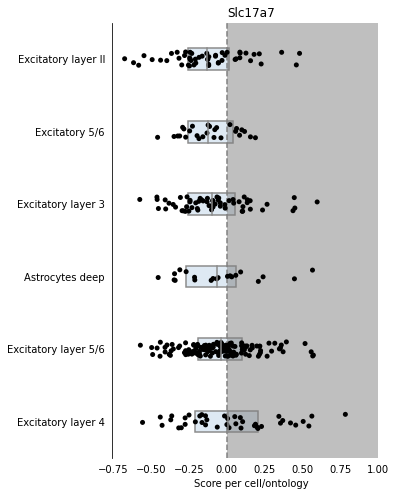

In [78]:
# simplified diagram for a single gene
genes = seq_periph_gene_ont['gene'].unique()

for gene in genes:

    plot_df = seq_periph_gene_cell[seq_periph_gene_cell['gene'].eq(gene)].copy()
    plot_df = plot_df.groupby('annotation').filter(lambda g: len(g) > 10)
    plot_df['mean_ont_score'] = plot_df.groupby('annotation')['score'].transform('mean')
    plot_df = plot_df.sort_values('mean_ont_score')

    fig = plt.figure(figsize=(5,8))
    
    ax = sns.stripplot(
        x = 'score',
        y = 'annotation',
        orient = 'h',
        color = 'black',
        data = plot_df,
    )
    sns.boxplot(
        x = 'score',
        y = 'annotation',
        orient = 'h',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        color = '#DBE9F6',
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axvline(0,linestyle='dashed',color='grey')
    plt.axvspan(0,1,facecolor='grey',alpha=0.5)
    plt.title('{}'.format(gene))
    plt.xlabel('Score per cell/ontology')
    plt.ylabel('')
    plt.show(fig)
    fig.savefig('{}_seqfish_periph_boxplot.svg'.format(gene),bbox_inches='tight')
    plt.close()
    

# SeqFISH+ radial

In [35]:
seq_radial_gene_cell = pd.read_csv('../outputs/gene_cell/SeqFish_radial.csv')
seq_radial_gene_cell = seq_radial_gene_cell[seq_radial_gene_cell['annotation'].ne('unannotated')]

#filter SRRS results to
#1. Drop gene/cells which have fewer than 5 gene spots of interest
#2. Drop gene/cell-type/samples with fewer than 20 cells
seq_radial_gene_cell = seq_radial_gene_cell[seq_radial_gene_cell['num_gene_spots'].ge(5)]
seq_radial_gene_cell = seq_radial_gene_cell.groupby(['gene','annotation']).filter(lambda g: len(g) >= 10)

#Calculate z from Lyapunov CLT for each gene in each sample
gb_cols = ['gene','annotation']

seq_agg_df = seq_radial_gene_cell.groupby(gb_cols).agg(
    num_cells = ('cell_id','nunique'),
    med_gene_spots = ('num_gene_spots','median'),
    med_spots = ('num_spots','median'),
    med_score = ('score','median'),
    score_sum = ('score','sum'),
    var_sum = ('variance','sum'),
).reset_index()

seq_agg_df['z'] = seq_agg_df['score_sum']/np.sqrt(seq_agg_df['var_sum'])

#Calculate two-sided p and BH correct ps
p_onesided = stats.norm.cdf(seq_agg_df['z'])
seq_agg_df['p'] = 2*np.minimum(p_onesided, 1-p_onesided)

alpha = 0.05

_,adj_p,_,_ = multitest.multipletests(
    seq_agg_df['p'],
    alpha = alpha,
    method = 'fdr_bh',
)
seq_agg_df['bh_p'] = adj_p

seq_agg_df.head()

,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,Aamp,Excitatory layer 5/6,20,5.5,12498.0,-0.457088,-8.061421,2.419260,-5.182870,2.184973e-07,3.006294e-07
1,Abca2,Excitatory layer 5/6,12,5.5,12103.0,-0.406128,-4.603043,1.480116,-3.783530,1.546197e-04,1.672387e-04
2,Abca2,Oligodendrocytes,15,13.0,3818.0,-0.612151,-8.758834,1.020810,-8.669095,4.355688e-18,1.652009e-17
3,Abca3,Excitatory layer 5/6,19,7.0,10596.0,-0.463476,-7.477663,2.108726,-5.149391,2.613342e-07,3.557478e-07
4,Abcf2,Excitatory layer 5/6,10,6.0,12465.5,-0.337118,-3.208065,1.115562,-3.037361,2.386594e-03,2.454722e-03


In [36]:
seq_radial_gene_ont = seq_agg_df[
    seq_agg_df['bh_p'].le(0.05) &
    seq_agg_df['num_cells'].ge(10)
].groupby('gene').filter(
    lambda g: g['med_score'].max()*g['med_score'].min() < 0
)

seq_radial_gene_ont

,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p


In [39]:
seq_agg_df[
    seq_agg_df['bh_p'].le(0.05) &
    seq_agg_df['med_score'].le(0).all()
]['gene'].nunique()

522

In [41]:
seq_agg_df[
    seq_agg_df['bh_p'].le(0.05)
]['med_score'].max()

-0.037889419028908224

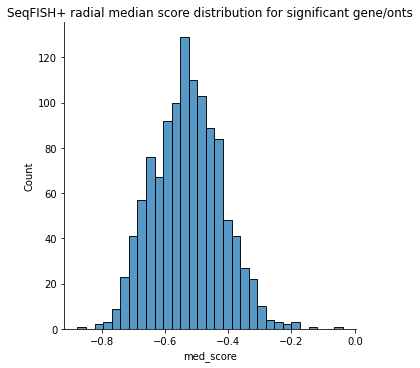

In [45]:
sns.displot(
    seq_agg_df[
        seq_agg_df['bh_p'].le(0.05)
    ]['med_score']
)
plt.title('SeqFISH+ radial median score distribution for significant gene/onts')
plt.show()
plt.close()

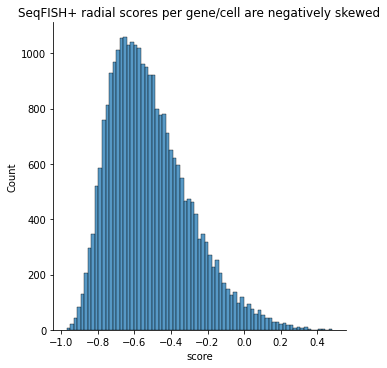

In [48]:
sns.displot(
    seq_radial_gene_cell['score']
)
plt.title('SeqFISH+ radial scores per gene/cell are negatively skewed')
plt.show()
plt.close()

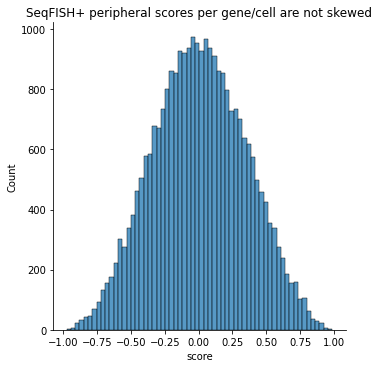

In [49]:
sns.displot(
    seq_periph_gene_cell['score']
)
plt.title('SeqFISH+ peripheral scores per gene/cell are not skewed')
plt.show()
plt.close()